In [488]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["figure.dpi"] = 300
plt.rcParams["grid.linewidth"] = 1

## Data preprocessing
The following block remove outliers, insignificant columns and correlated values from the initial file `local_global_res_13_12.csv`

In [489]:
data = pd.read_csv('./data/local_global_res_13_12.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36454 entries, 0 to 36453
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   36454 non-null  int64  
 1   Unnamed: 0     36010 non-null  float64
 2   train_time     36280 non-null  float64
 3   forecast_time  36280 non-null  float64
 4   MAE            36280 non-null  float64
 5   MSE            36280 non-null  float64
 6   RMSE           36280 non-null  float64
 7   MASE           36280 non-null  float64
 8   RMSSE          36280 non-null  float64
 9   MAPE           36280 non-null  float64
 10  SMAPE          36280 non-null  float64
 11  naming_orig    36454 non-null  object 
 12  model_name     36454 non-null  object 
 13  dataset_name   36454 non-null  object 
 14  horizon        36454 non-null  int64  
 15  split          36454 non-null  object 
 16  pred_time      0 non-null      float64
dtypes: float64(11), int64(2), object(4)
memory usage: 

Let's look at the data and display the number of unique values for each column. If column contains numeric data, min and max values (excluding NaNs) are displayed also.

### Duplicates and irrelevant columns handling
First of all, we remove all the irrelevant data, duplicates nad artefacts from the dataset.

In [490]:
print(f'Duplicated rows:\n{data.duplicated()}\n')
print(f'Rows with NaN:\n{data.isna().sum()}\n')

Duplicated rows:
0        False
1        False
2        False
3        False
4        False
         ...  
36449    False
36450    False
36451    False
36452    False
36453    False
Length: 36454, dtype: bool

Rows with NaN:
Unnamed: 0.1         0
Unnamed: 0         444
train_time         174
forecast_time      174
MAE                174
MSE                174
RMSE               174
MASE               174
RMSSE              174
MAPE               174
SMAPE              174
naming_orig          0
model_name           0
dataset_name         0
horizon              0
split                0
pred_time        36454
dtype: int64



In [491]:
data

,Unnamed: 0.1,Unnamed: 0,train_time,forecast_time,MAE,MSE,RMSE,MASE,RMSSE,MAPE,SMAPE,naming_orig,model_name,dataset_name,horizon,split,pred_time
0,0,0.0,3.812914,4.442261,18.260277,619.323792,24.886217,0.896638,0.792087,inf,16.386864,danish_atm_daily_5,CatBoostAutoRegressivePipelineEtna_3lags_gl,danish_atm_daily,30,test,NaN
1,1,0.0,3.485261,4.376619,28.395468,1160.189331,34.061552,1.088141,0.918072,41.157335,17.157184,danish_atm_daily_84,CatBoostAutoRegressivePipelineEtna_3lags_gl,danish_atm_daily,30,validation,NaN
2,2,0.0,3.812914,4.442261,12.825266,269.356567,16.412086,0.814535,0.757765,39.022604,13.038494,danish_atm_daily_32,CatBoostAutoRegressivePipelineEtna_3lags_gl,danish_atm_daily,30,test,NaN
3,3,0.0,3.485261,4.376619,26.284388,1121.348877,33.486548,0.918232,0.792925,57.078475,18.962322,danish_atm_daily_25,CatBoostAutoRegressivePipelineEtna_3lags_gl,danish_atm_daily,30,validation,NaN
4,4,0.0,3.485261,4.376619,15.145726,429.357697,20.720948,0.663444,0.597604,21.996029,10.027625,danish_atm_daily_6,CatBoostAutoRegressivePipelineEtna_3lags_gl,danish_atm_daily,30,validation,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36449,0,NaN,225.815618,1.806664,2.762839,11.352131,3.369292,0.779592,0.688223,20.044580,8.785076,nn5_98,DeepARTuningObjective,nn5,30,validation,NaN
36450,0,NaN,221.914140,1.835336,2.712137,16.868277,4.107101,0.679580,0.778644,29.559124,10.474208,nn5_99,DeepARTuningObjective,nn5,30,test,NaN
36451,0,NaN,225.815618,1.806664,1.519503,3.326512,1.823873,0.381234,0.345513,11.370875,5.622922,nn5_99,DeepARTuningObjective,nn5,30,validation,NaN
36452,0,NaN,221.914140,1.835336,3.380999,22.316181,4.724001,0.658609,0.684295,23.539458,8.428656,nn5_9,DeepARTuningObjective,nn5,30,test,NaN


In [492]:
from pandas.api.types import is_numeric_dtype

sizes = pd.DataFrame(index=data.columns, columns=['unique_values', 'min', 'max'])

for col in data.columns:
    # For each column calculate number of unique values
    sizes.loc[col]['unique_values'] = len(data[col].unique())
    if is_numeric_dtype(data[col]):
        try:
            # If data type is numeric, try to calculate min and max values,
            # excluding NaNs
            sizes.loc[col]['min'] = np.min(data[col].dropna().unique())
            sizes.loc[col]['max'] = np.max(data[col].dropna().unique())
        except:
            # If column contains only NaNs, write NaN to both columns
            sizes.loc[col][['min', 'max']] = np.nan
    else:
        # If data type isn't numeric, write N/A - Not Applicable
        sizes.loc[col][['min', 'max']] = "N/A"

sizes

,unique_values,min,max
Unnamed: 0.1,36010,0,36009
Unnamed: 0,2,0.0,0.0
train_time,18633,0.00006,28655.271598
forecast_time,17056,0.000003,189.939747
MAE,29656,0.027207,8756287.0
MSE,29666,0.00074,115030313926656.0
RMSE,29666,0.027207,10725218.595752
MASE,29711,0.0,26820764541.625977
RMSSE,29715,0.0,26857884266.368134
MAPE,23749,6.512892,inf


As we can see, the `pred_time`, `horizon`, `Unnamed: 0` and `Unnamed: 0.1` columns can be dropped. Two latter columns are artefacts from files concatenation. `horizon` column contains only single value, `dataset_name` is redundant due to the fact, that dataset_name is included into time series name. `pred_time` contains no valuable data.

In [493]:
data = data.drop(['pred_time', 'horizon', 'Unnamed: 0', 
                  'Unnamed: 0.1', 'dataset_name'], axis=1)
data = data.dropna()

### Outliers handling
Secondly, the outliers are removed. We decided, that outliers can be no more that 2.5% of the total data volume.

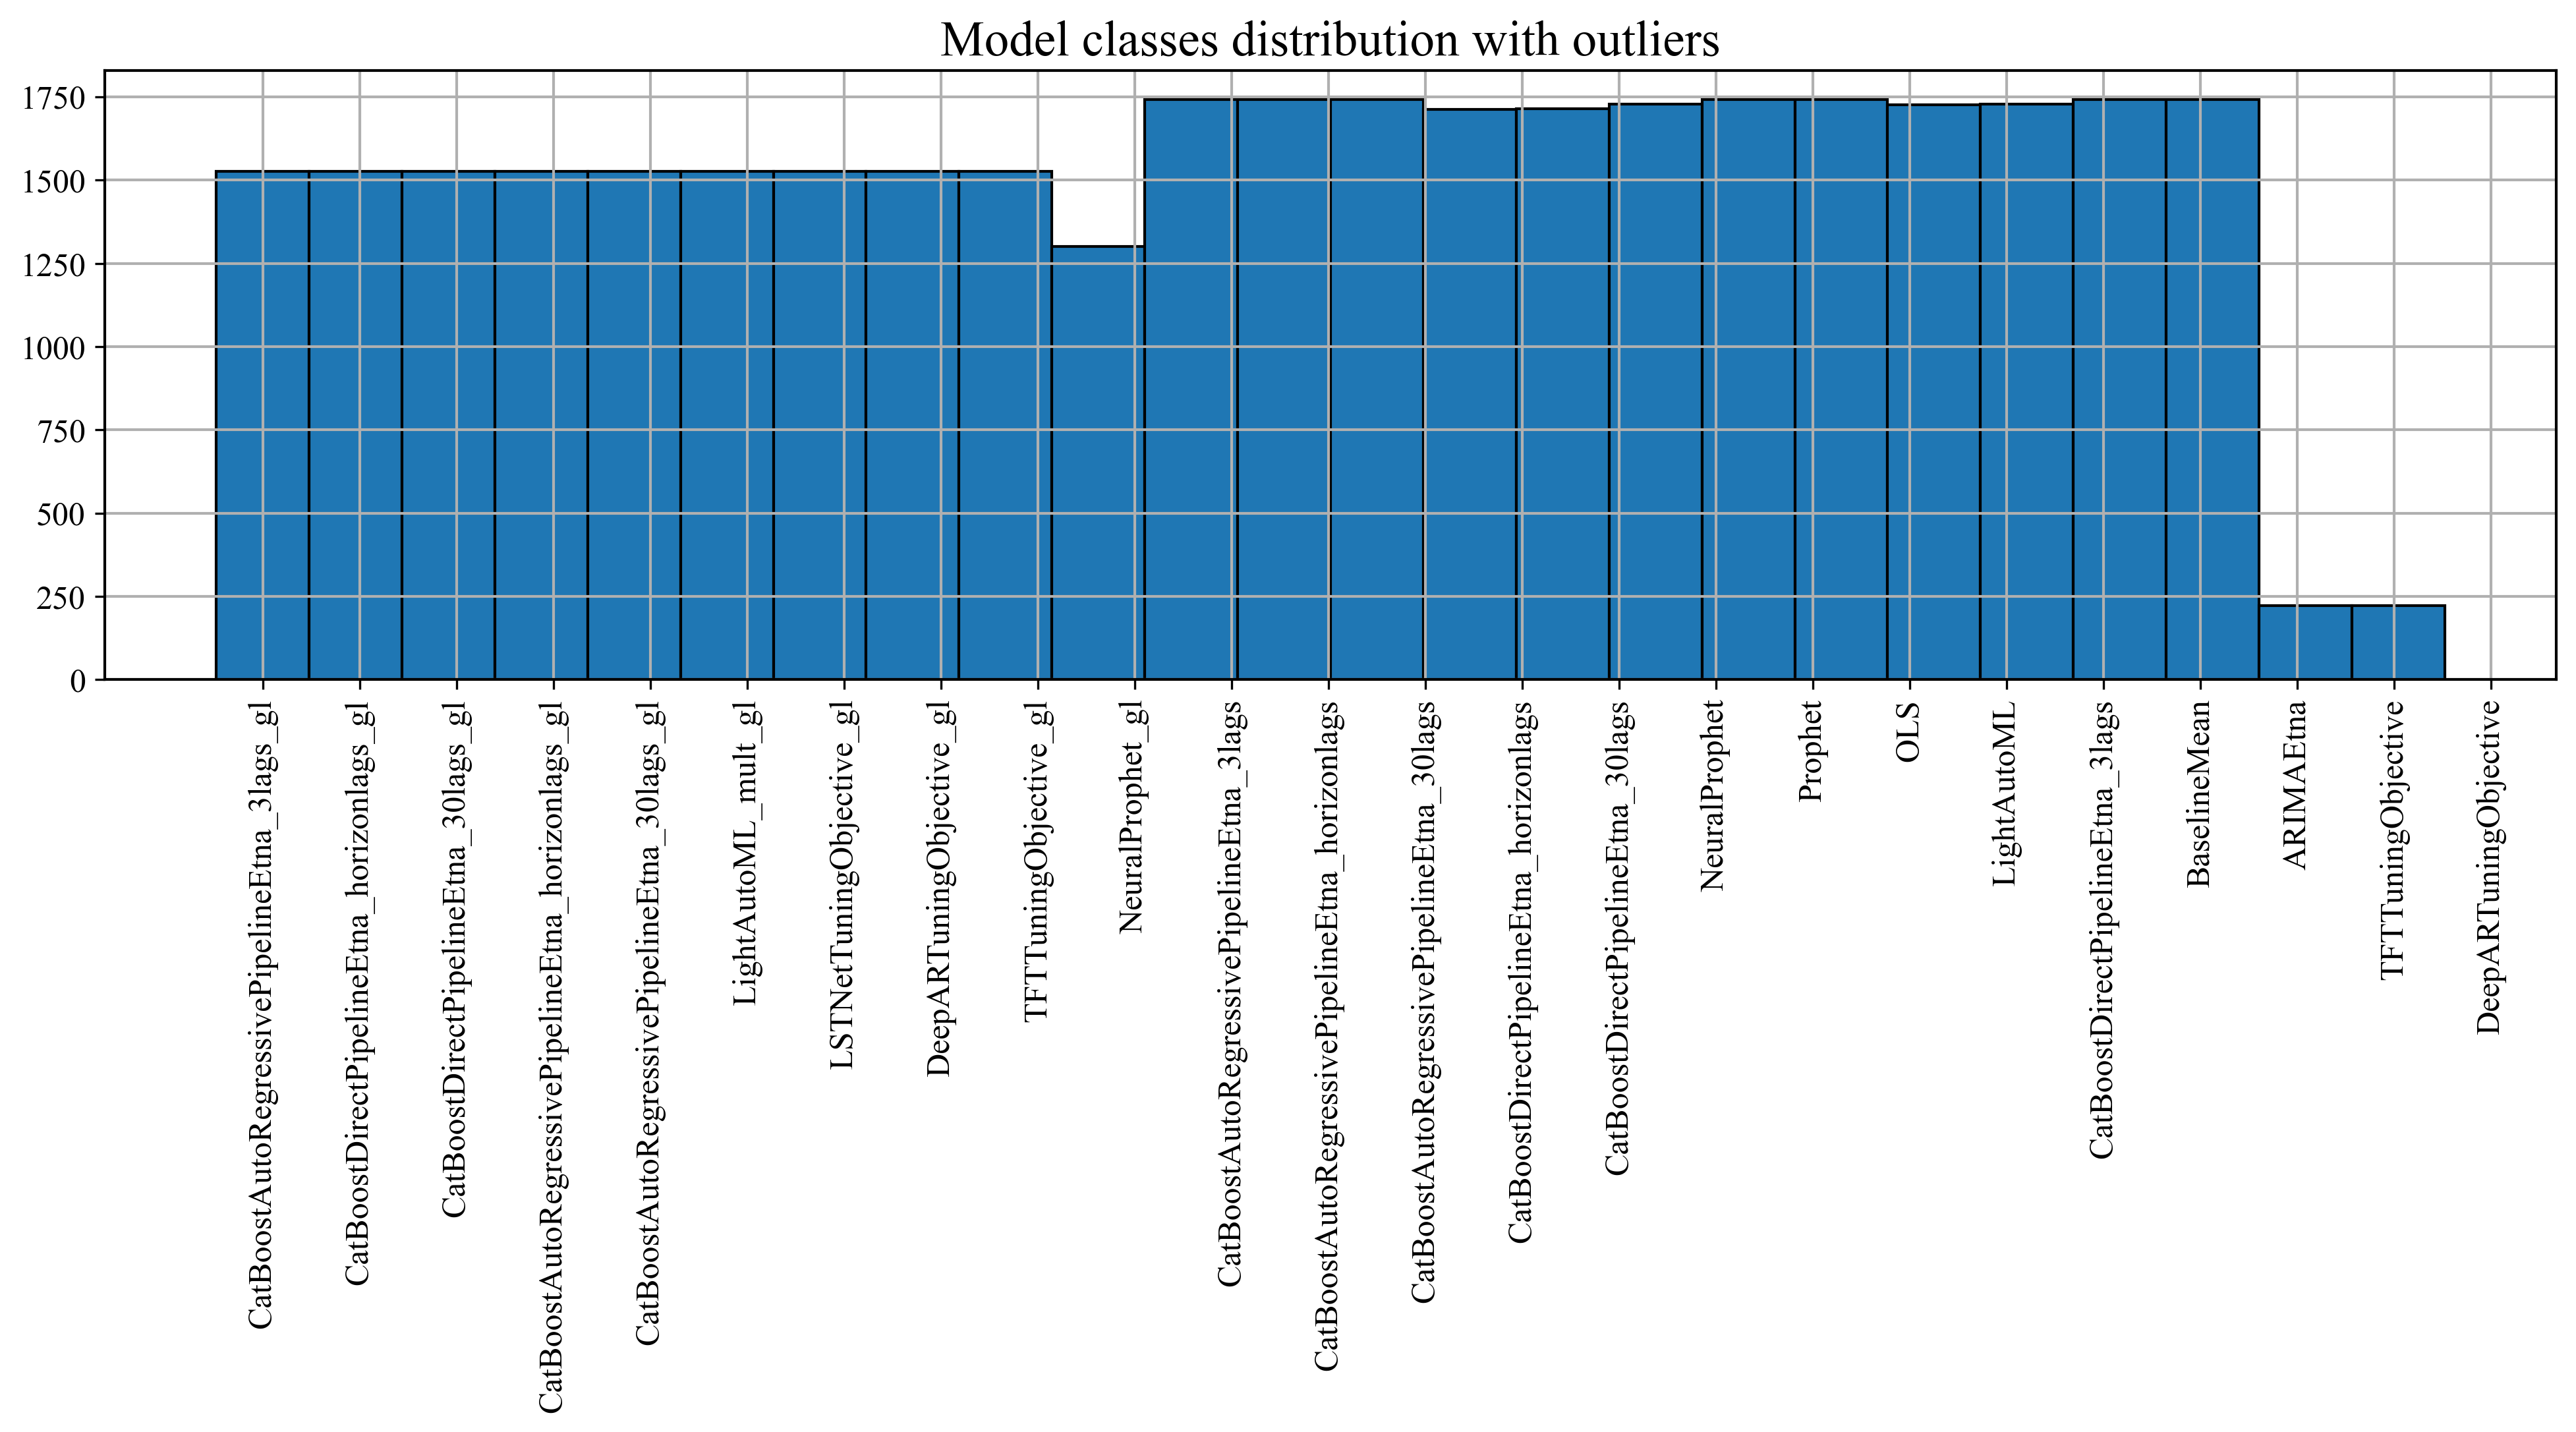

In [494]:
# Depict classes distribution histogram
fig = plt.figure(figsize=(16,4))
plt.hist(data['model_name'], bins=len(data['model_name'].unique()), 
         align='left', edgecolor='black')
plt.xticks(rotation=90); plt.grid()
plt.title('Model classes distribution with outliers')
plt.show()

Now, we will look at the remained numerical values to find anomalies using box plots.

We decided to exclude MAPE because of the metric unstability. As we can see, MAPE metrics become ill-contitioned whenever $y_i \in U(0)$, because
$$\text{MAPE}=100\% \times \frac{1}{n}\sum_{i=1}^{n}\frac{|y_i-\hat{y_i}|}{|y_i|},$$

where:

$y_i$ - time series i-th value;

$\hat{y_i}$ - predicted i-th value.

In [495]:
data = data.drop(['MAPE'], axis=1)

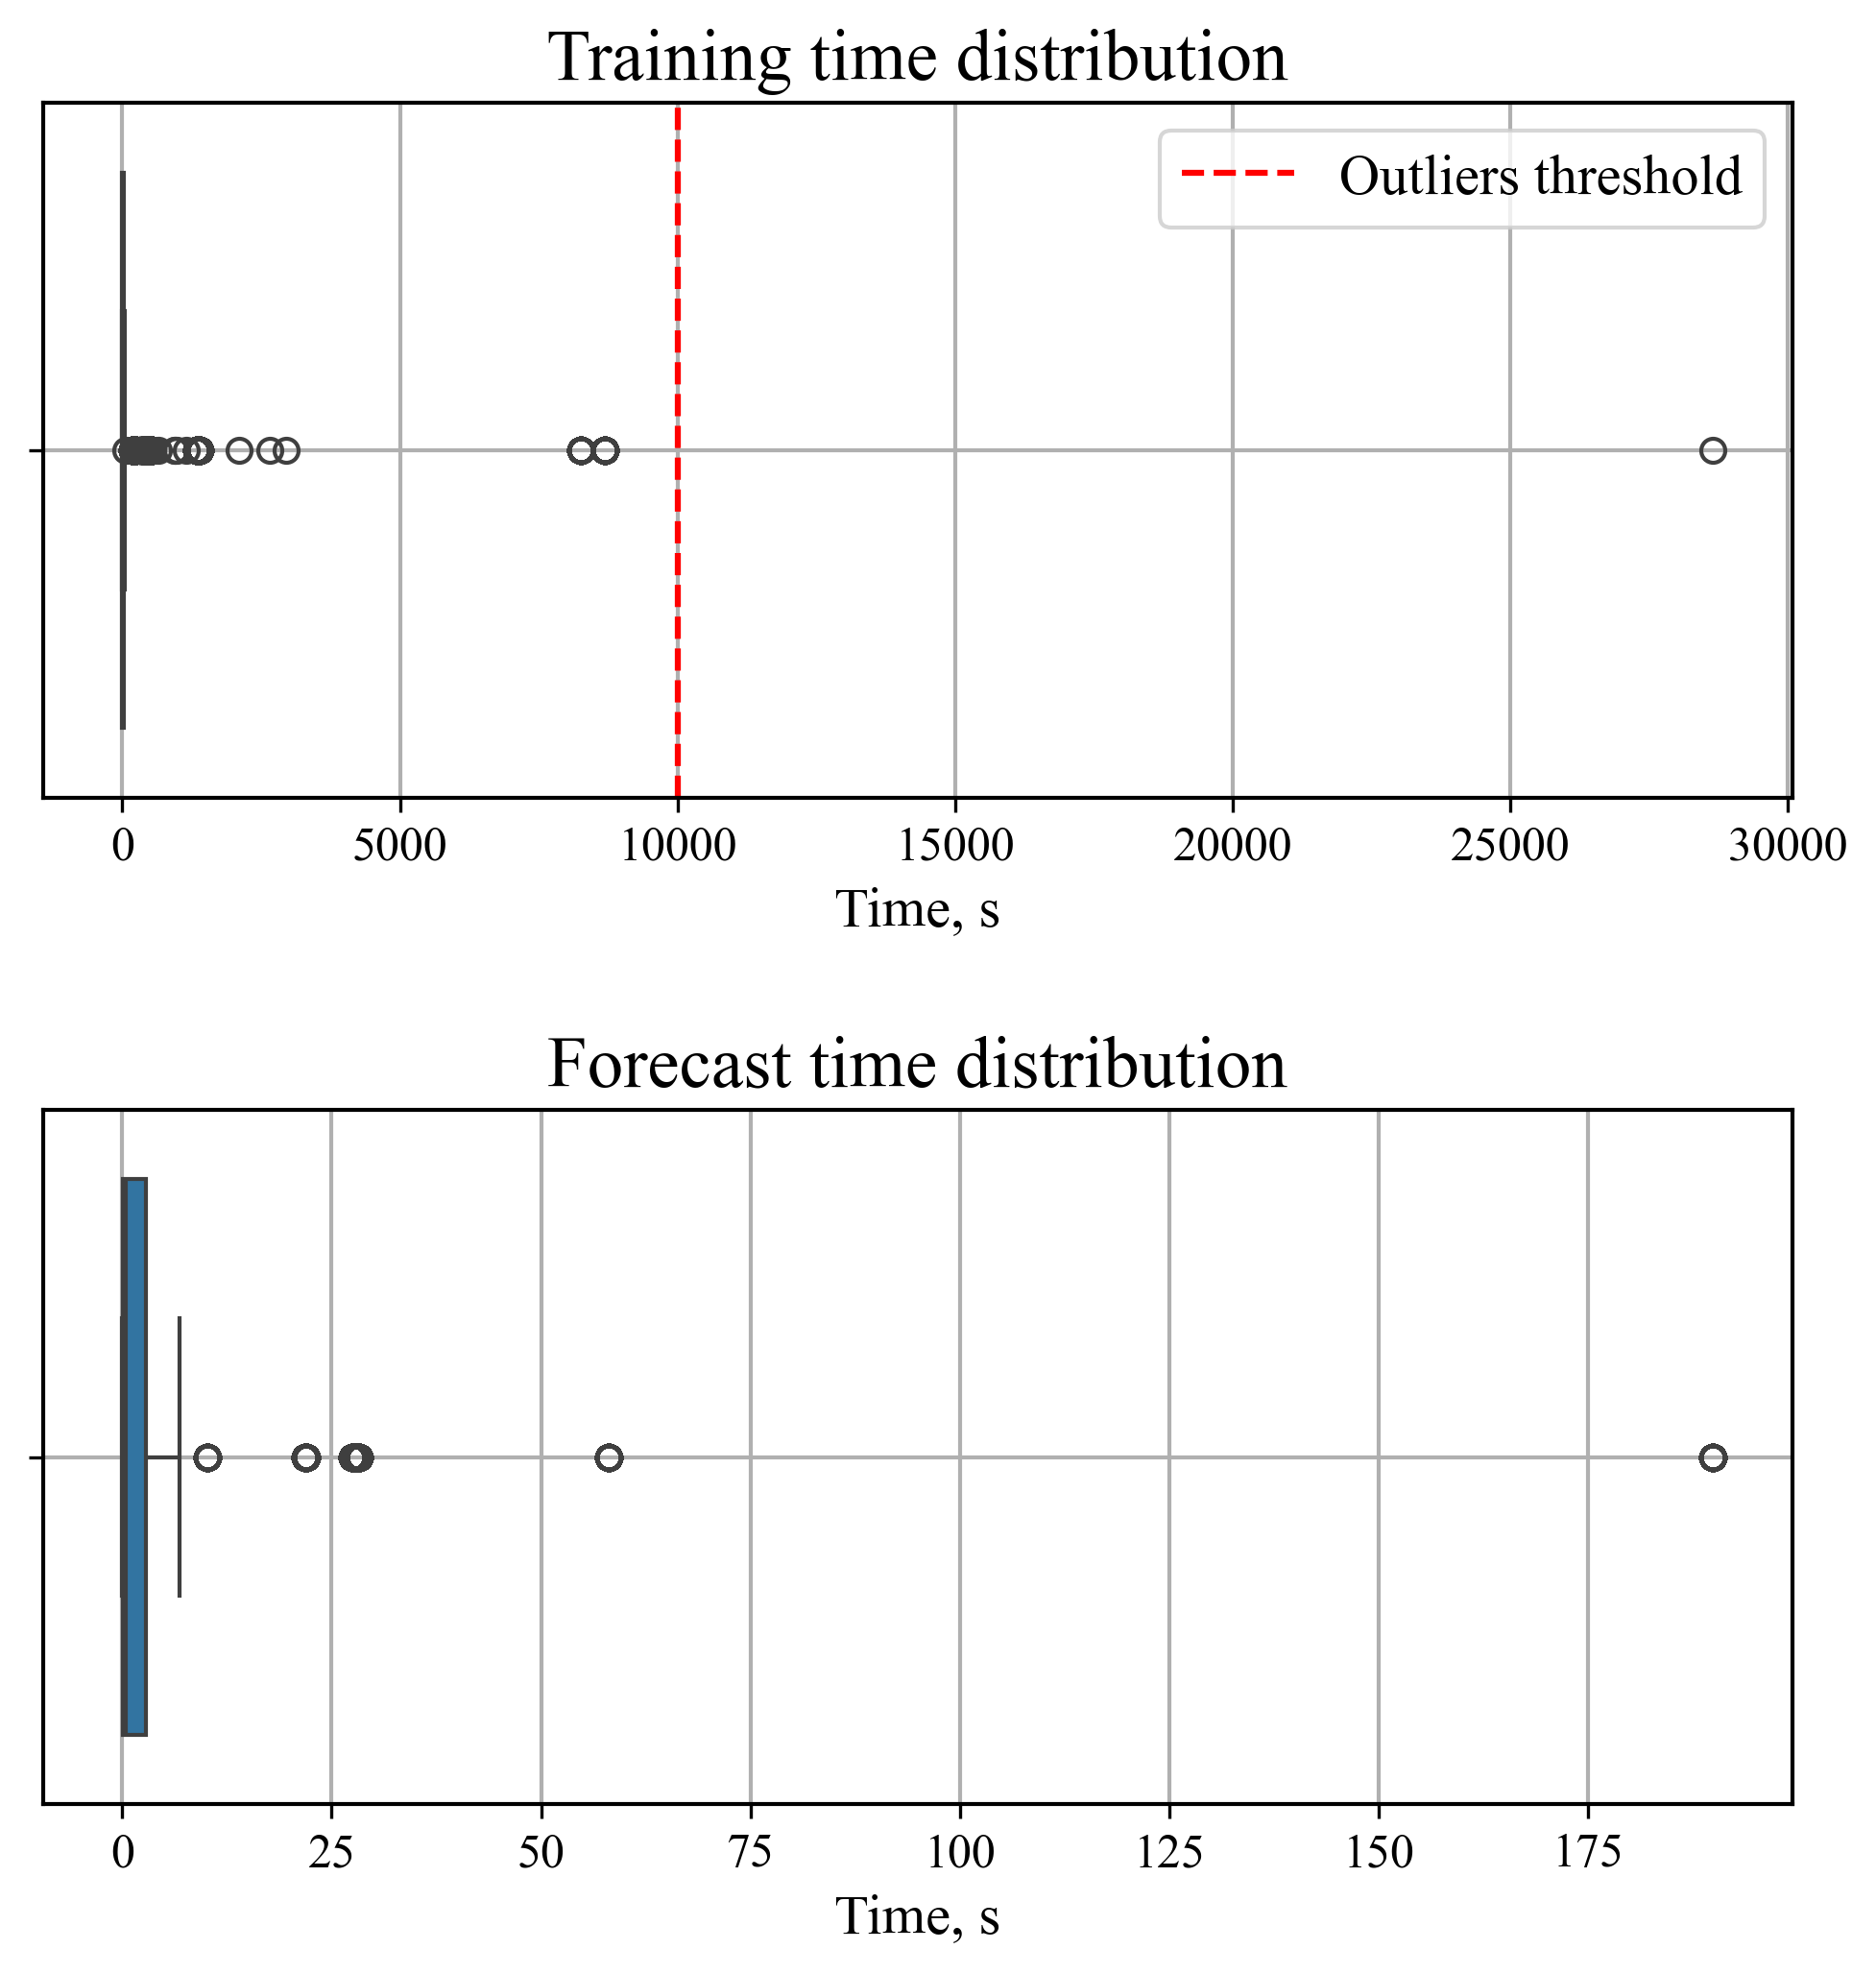

In [496]:
# Depict time metrics boxplots
times = ['train_time', 'forecast_time']
plot_labels = ['Training time distribution', 'Forecast time distribution']

fig, axes = plt.subplots(nrows=len(times), ncols=1, figsize=(6.75, 6.75*0.5*len(times)))
fig.subplots_adjust(hspace=0.45, left=0.05, right=0.95, bottom=0.075, top=0.95)

for ax, time, plot_label in zip(axes.flatten(), times, plot_labels):
    sns.boxplot(data[time], orient='h', ax=ax,)
    if time == 'train_time': 
        ax.axvline(x=10000, linestyle='--', color='r', label='Outliers threshold')
        ax.legend()
    
    ax.grid()
    ax.set_title(plot_label)
    ax.set_xlabel('Time, s')

plt.show()
fig.savefig('./output/time_outliers.pdf')

We can see, that there is an outlier w.r.t. to the train time.

In [497]:
data[data['train_time'] > 10000]

,train_time,forecast_time,MAE,MSE,RMSE,MASE,RMSSE,SMAPE,naming_orig,model_name,split
27920,28655.271598,0.262712,850909.875,1.127550e+12,1.061862e+06,0.927062,0.873742,17.660116,mipt_alpha_40,LightAutoML,validation


In [498]:
data = data.drop(data[data['train_time'] > 10000].index)

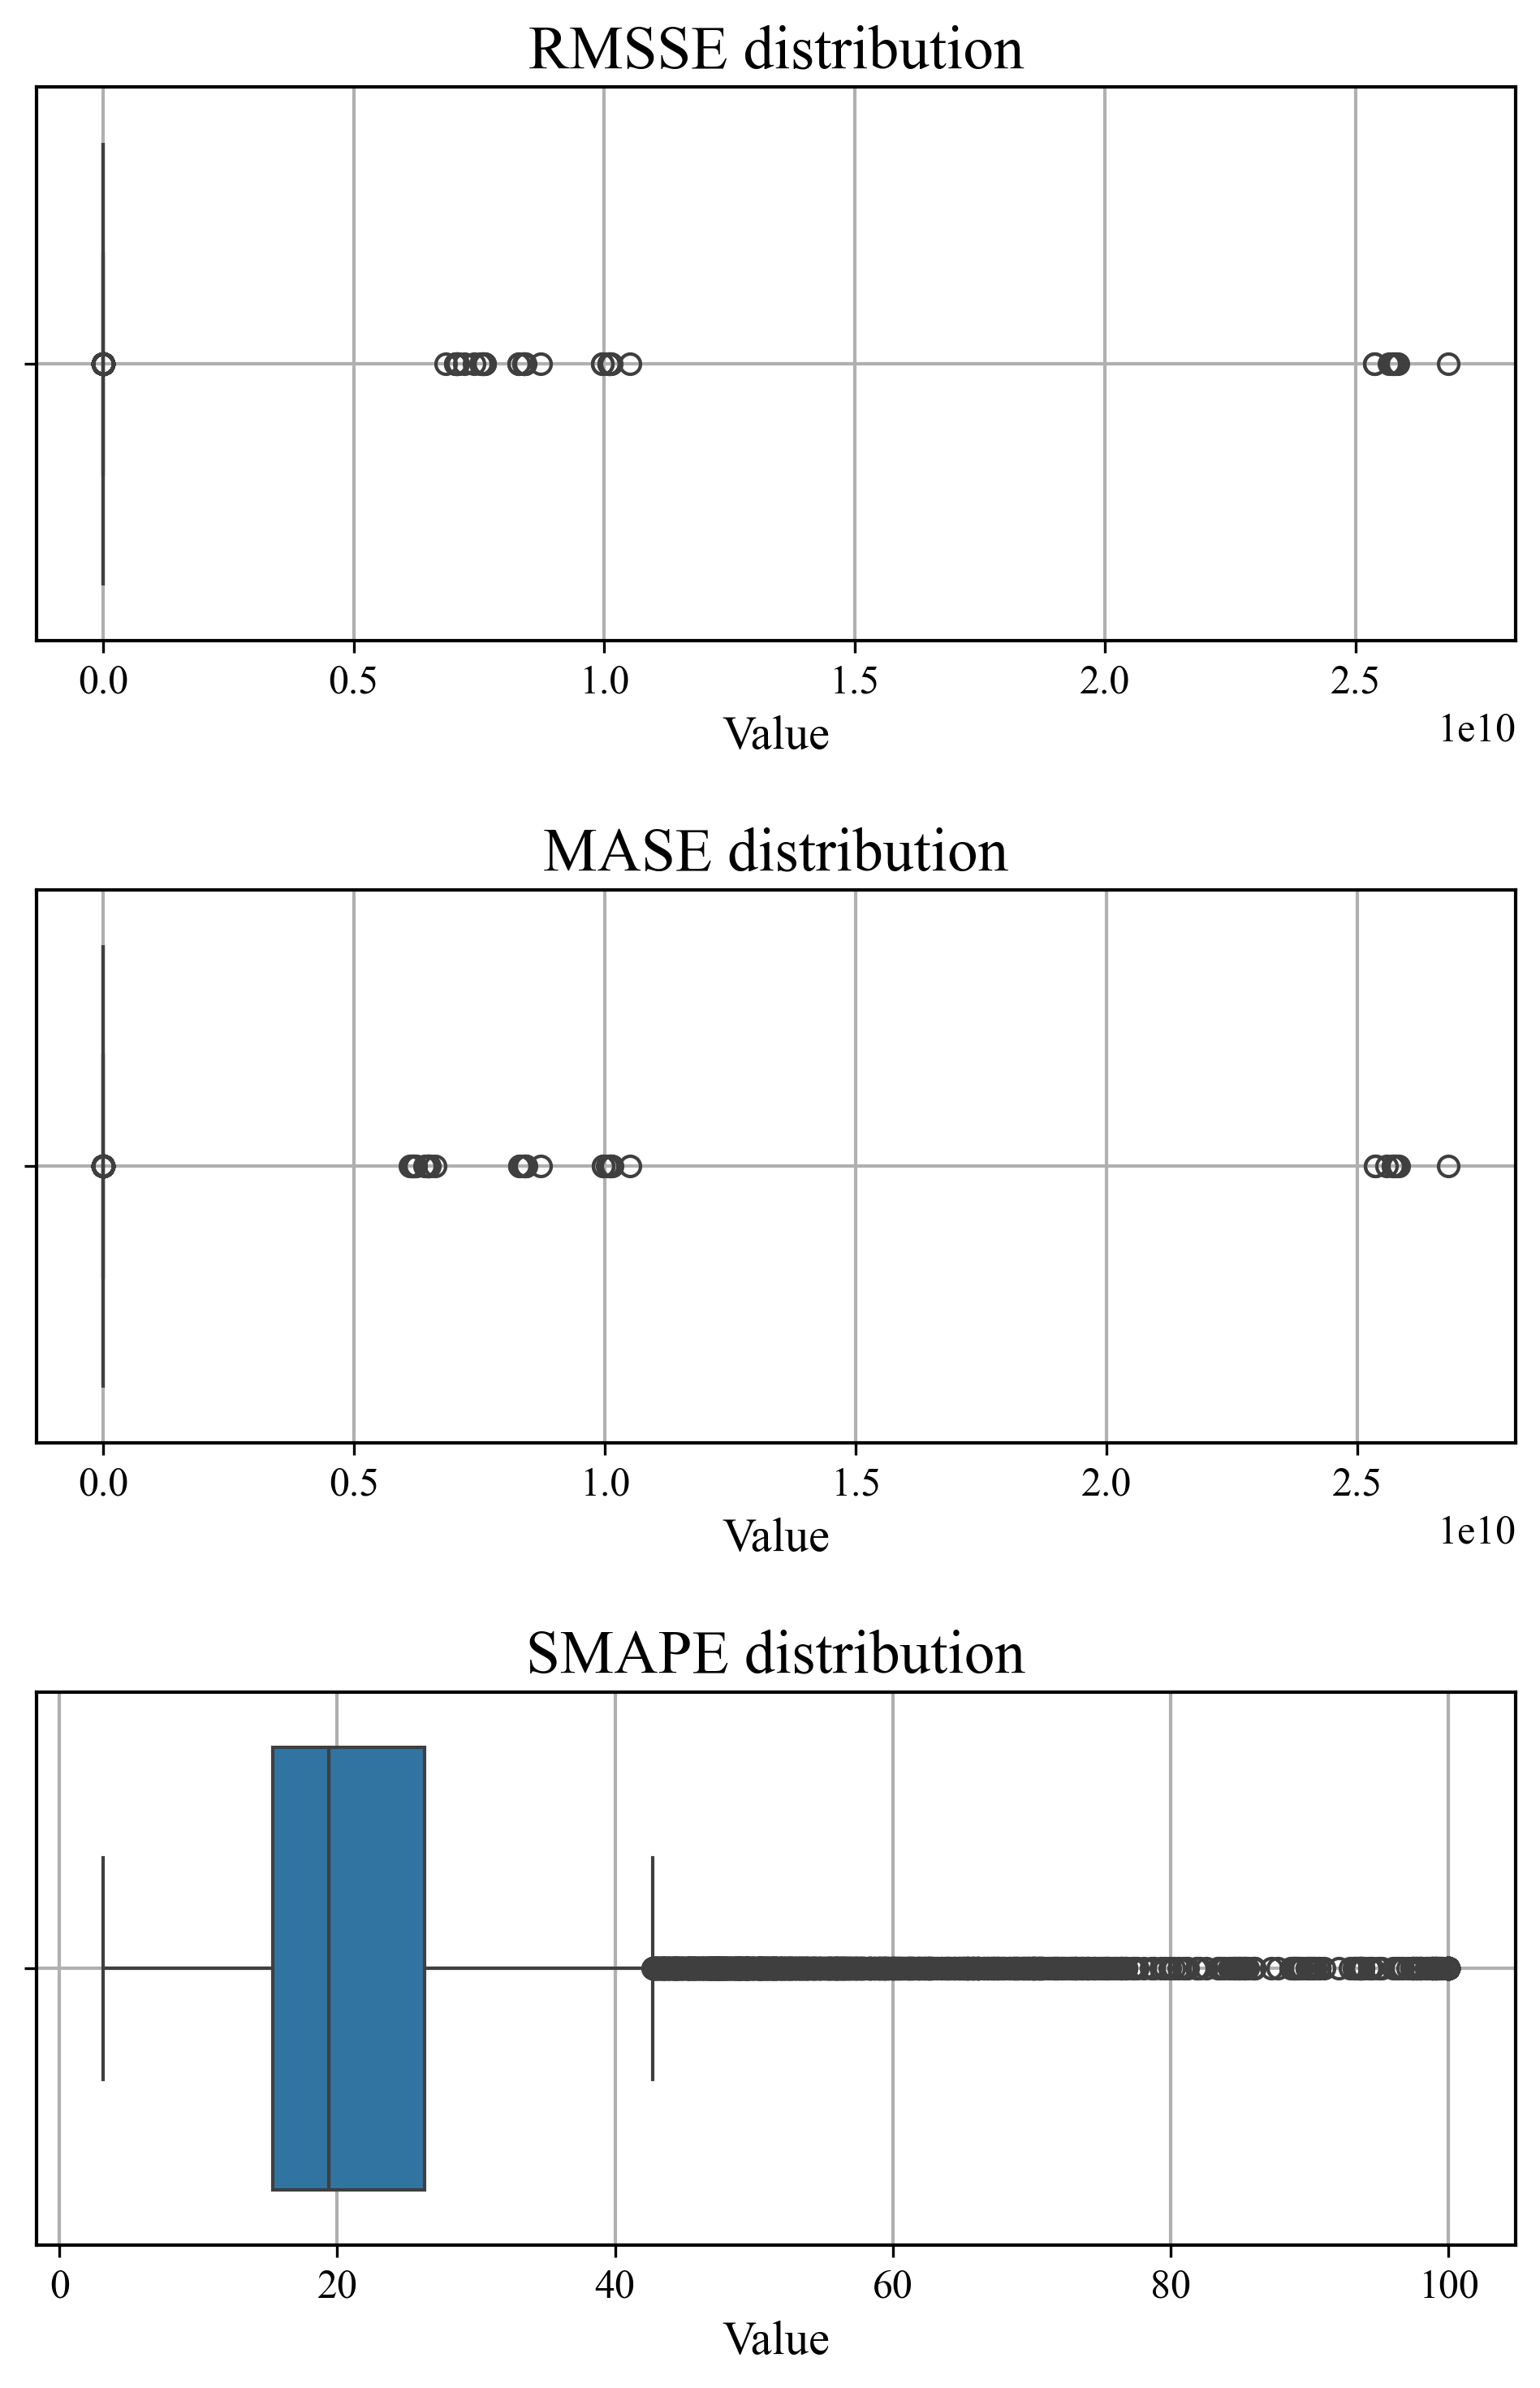

In [499]:
# Depict quality metrics boxplots
labels = data.select_dtypes(include=np.number).columns.tolist()
labels = [l for l in labels if l not in times]

labels = ['RMSSE', 'MASE', 'SMAPE']

fig, axes = plt.subplots(nrows=len(labels), ncols=1, figsize=(6.75, 6.75*0.5*len(labels)))
fig.subplots_adjust(hspace=0.45, left=0.05, right=0.95, bottom=0.075, top=0.95)

for ax, label in zip(axes.flatten(), labels):
    sns.boxplot(data[label], ax=ax, orient='h')
    ax.grid()
    ax.set_title(f'{label} distribution')
    ax.set_xlabel('Value')

plt.show()

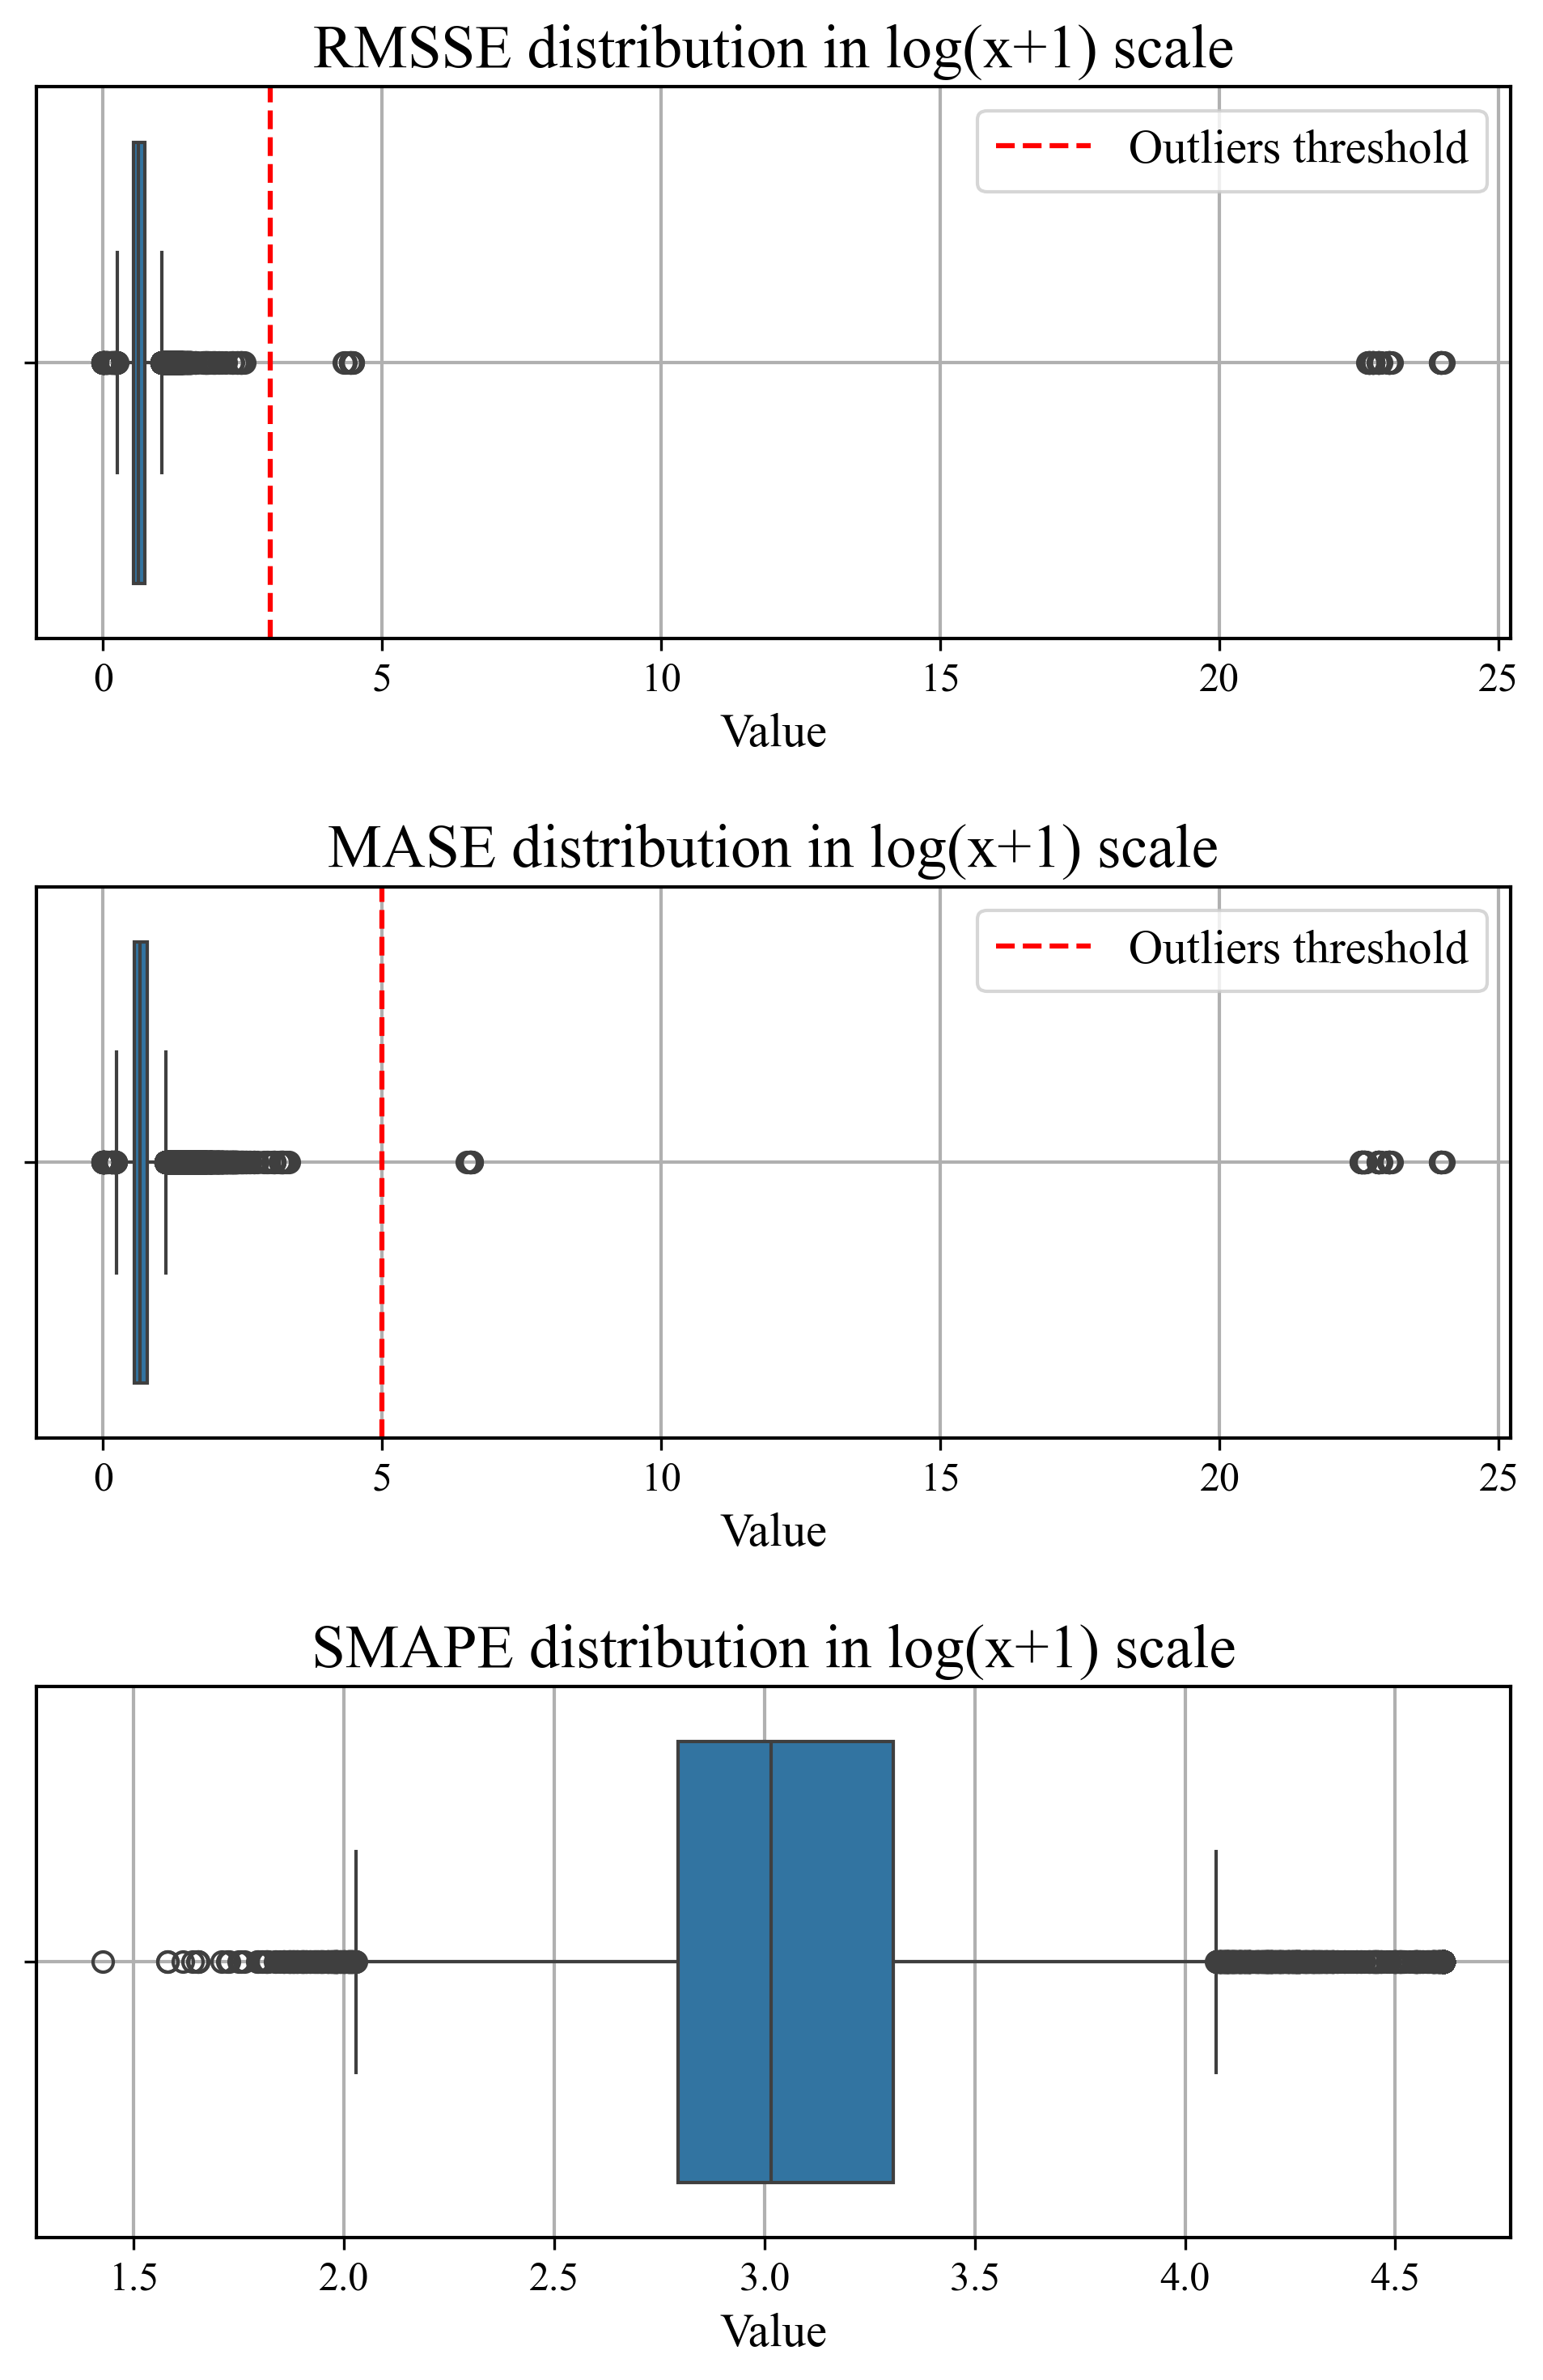

In [500]:
# Depict time metrics boxplots in log(1+x) scale
fig, axes = plt.subplots(nrows=len(labels), ncols=1, figsize=(6.75, 6.75*0.5*len(labels)))
fig.subplots_adjust(hspace=0.45, left=0.05, right=0.95, bottom=0.075, top=0.95)

for ax, label in zip(axes.flatten(), labels):
    sns.boxplot(np.log1p(data[label]), ax=ax, orient='h')
    # Outliers thresholds drawing
    if label == "RMSSE":
        ax.axvline(x=3, linestyle='--', color='r', label='Outliers threshold')
        ax.legend()
    if label == "MASE":
        ax.axvline(x=5, linestyle='--', color='r', label='Outliers threshold')
        ax.legend()
        
    ax.grid()
    ax.set_title(f'{label} distribution in log(x+1) scale')
    ax.set_xlabel('Value')

plt.show()
fig.savefig('./output/metric_outliers.pdf')

It is obvious, that MASE and RMSSE in the $\log(x+1)$ scale highlight outliers. We have tried several threshold for MASE, RMSSE and RMSE and decided to apply the following threshold

$$S=\lbrace y_i, X_i \rbrace_{i=1}^m: \forall X \in S \Rightarrow X_{\text{MASE}} \leq \exp(5)-1 \cap X_{\text{RMSSE}} \leq \exp(3)-1 \cap X_{\text{training\_time}} \leq 10^4.$$

In [501]:
rmsse_th = np.exp(3) - 1
mase_th = np.exp(5) - 1

outliers = len(data[(data['MASE'] > mase_th) | (data['RMSSE'] > rmsse_th)])
print(f'Number of rows with MASE > {mase_th:.2f} or RMSSE > {rmsse_th:.2f}: {outliers}')
print(f'Outliers rate: {outliers/len(data):.2%}')

Number of rows with MASE > 147.41 or RMSSE > 19.09: 54
Outliers rate: 0.15%


In [502]:
data[(data['MASE'] > mase_th) | (data['RMSSE'] > rmsse_th)]

,train_time,forecast_time,MAE,MSE,RMSE,MASE,RMSSE,SMAPE,naming_orig,model_name,split
53,3.812914,4.442261,6.131524,56.617256,7.524444,6.131524e+09,7.524444e+09,39.032561,danish_atm_daily_111,CatBoostAutoRegressivePipelineEtna_3lags_gl,test
75,3.812914,4.442261,12.818467,365.421326,19.115997,7.135613e+02,8.234437e+01,25.457659,danish_atm_daily_110,CatBoostAutoRegressivePipelineEtna_3lags_gl,test
78,3.485261,4.376619,10.501555,110.459610,10.509977,1.050156e+10,1.050998e+10,100.000000,danish_atm_daily_111,CatBoostAutoRegressivePipelineEtna_3lags_gl,validation
142,3.812914,4.442261,6.620748,51.877560,7.202608,6.620748e+09,7.202608e+09,62.582374,danish_atm_daily_112,CatBoostAutoRegressivePipelineEtna_3lags_gl,test
162,3.485261,4.376619,8.725776,76.253593,8.732330,8.725776e+09,8.732330e+09,100.000000,danish_atm_daily_112,CatBoostAutoRegressivePipelineEtna_3lags_gl,validation
188,3.485261,4.376619,26.820765,721.345947,26.857884,2.682076e+10,2.685788e+10,98.883414,danish_atm_daily_110,CatBoostAutoRegressivePipelineEtna_3lags_gl,validation
247,4.154512,0.130089,8.290218,68.727699,8.290217,8.290218e+09,8.290217e+09,100.000000,danish_atm_daily_112,CatBoostDirectPipelineEtna_horizonlags_gl,validation
277,4.301992,0.159918,6.455943,49.305920,7.021817,6.455943e+09,7.021817e+09,62.672615,danish_atm_daily_112,CatBoostDirectPipelineEtna_horizonlags_gl,test
326,4.301992,0.159918,12.770802,364.935699,19.103290,7.109079e+02,8.228964e+01,25.624555,danish_atm_daily_110,CatBoostDirectPipelineEtna_horizonlags_gl,test
358,4.154512,0.130089,9.959980,99.201164,9.959978,9.959980e+09,9.959978e+09,100.000000,danish_atm_daily_111,CatBoostDirectPipelineEtna_horizonlags_gl,validation


As the number of outliers does not exceeds 1%, we can drop them out.

In [503]:
data = data.drop(data[(data['MASE'] > mase_th) | (data['RMSSE'] > rmsse_th)].index)

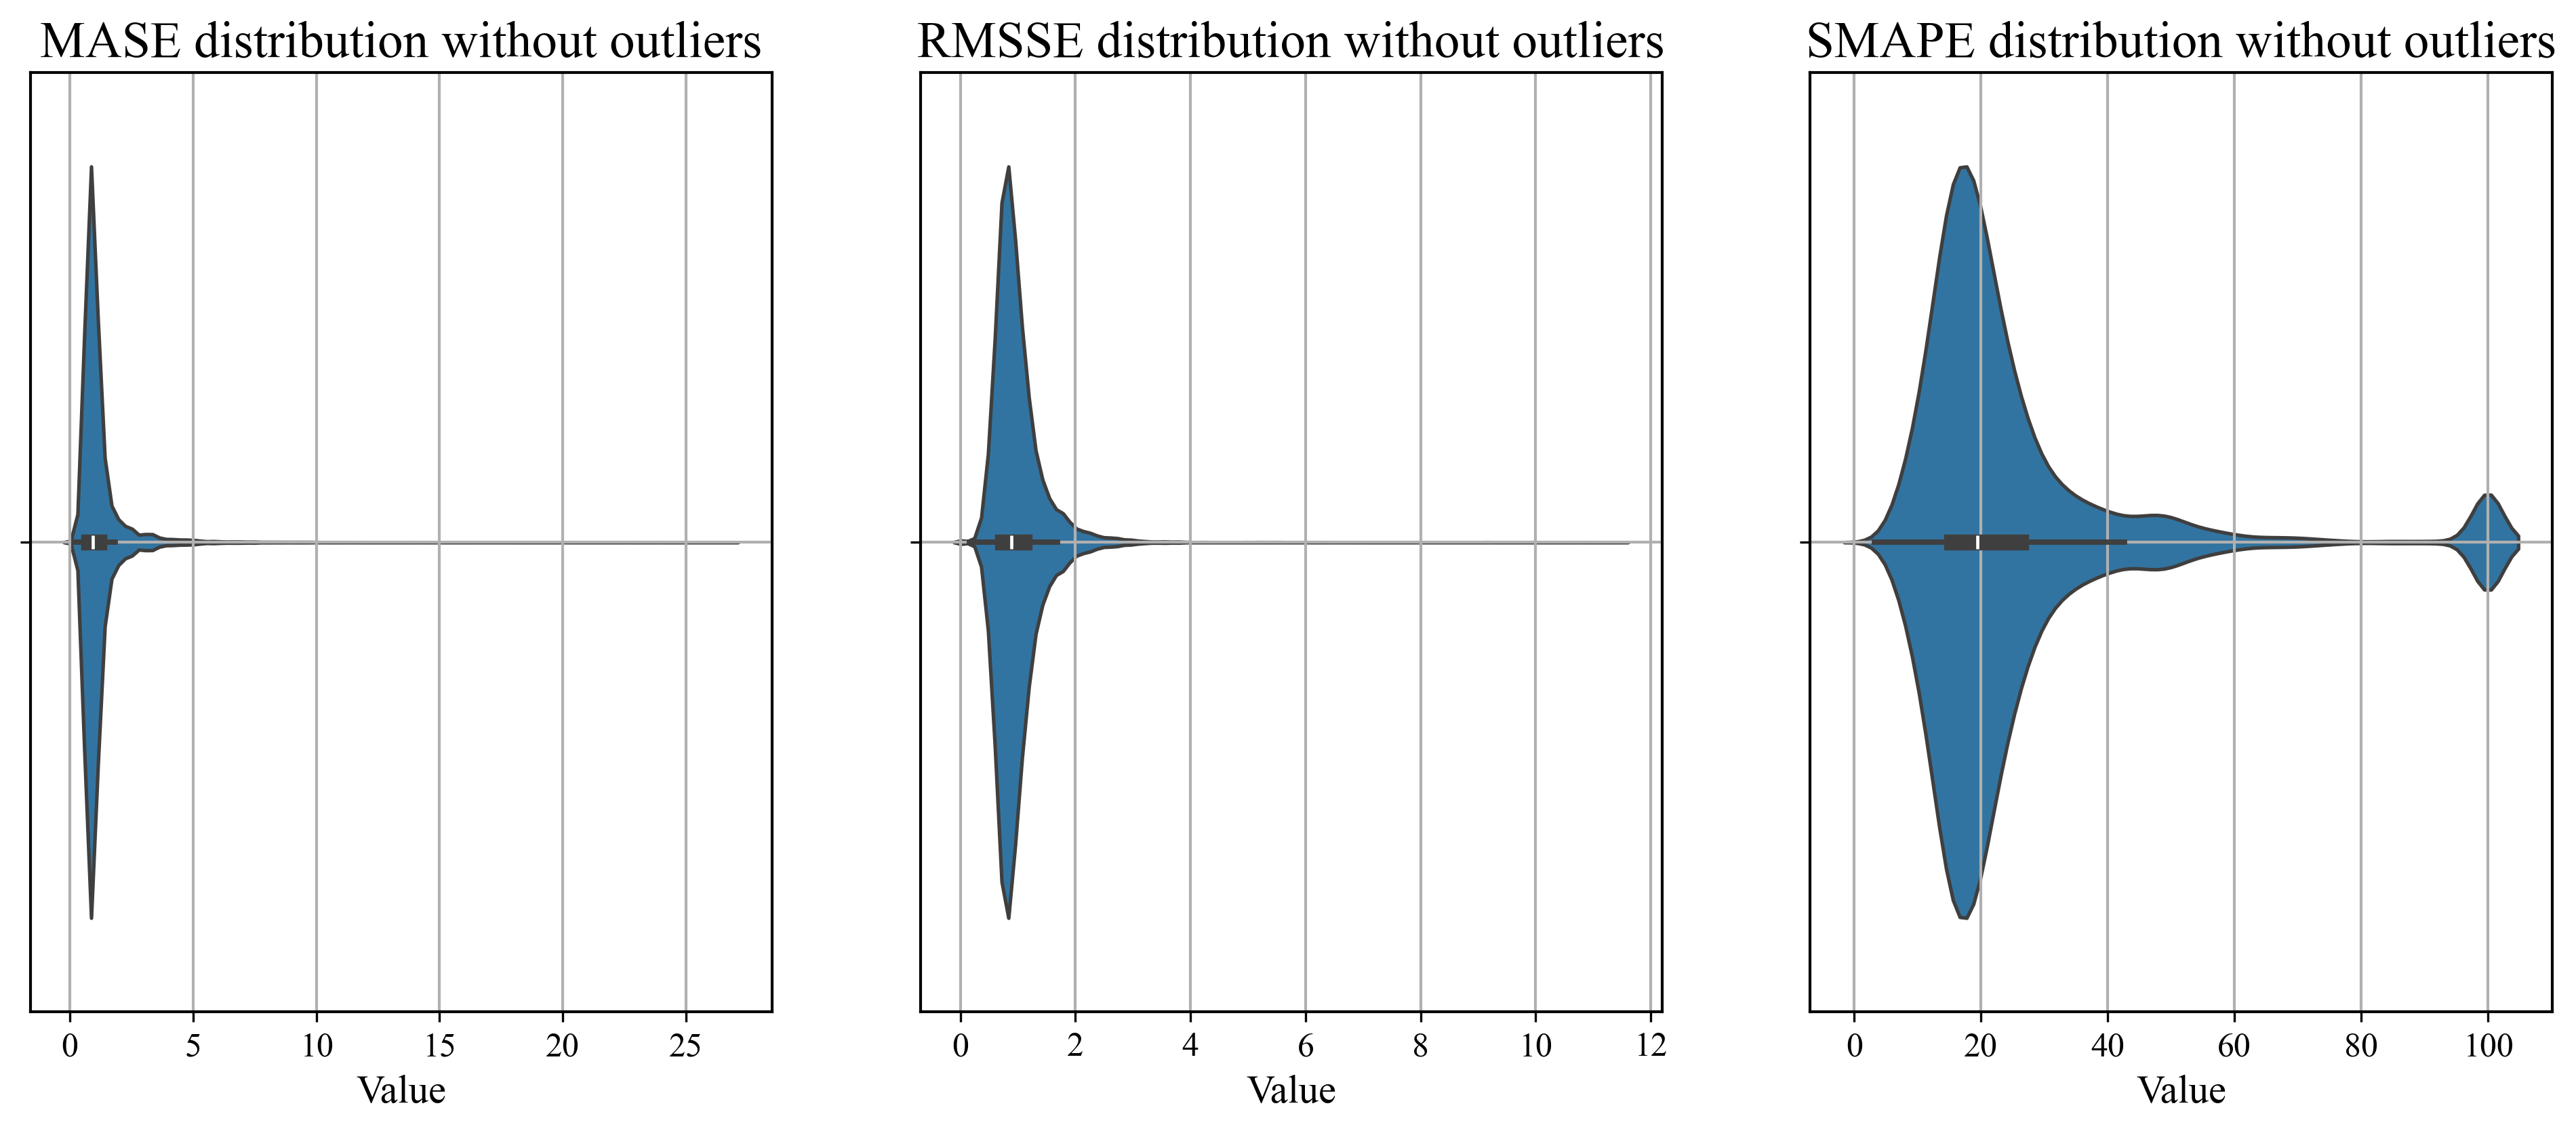

In [504]:
# Depict final metrics
labels = ['MASE', 'RMSSE', 'SMAPE']

fig, axes = plt.subplots(nrows=1, ncols=len(labels), figsize=(16, 6))
fig.subplots_adjust(hspace=0.4)

for ax, label in zip(axes.flatten(), labels):
    ax.set_xlabel('Value')
    sns.violinplot(data[label], ax=ax, orient='h')
    ax.grid()
    ax.set_title(f'{label} distribution without outliers')

plt.show()

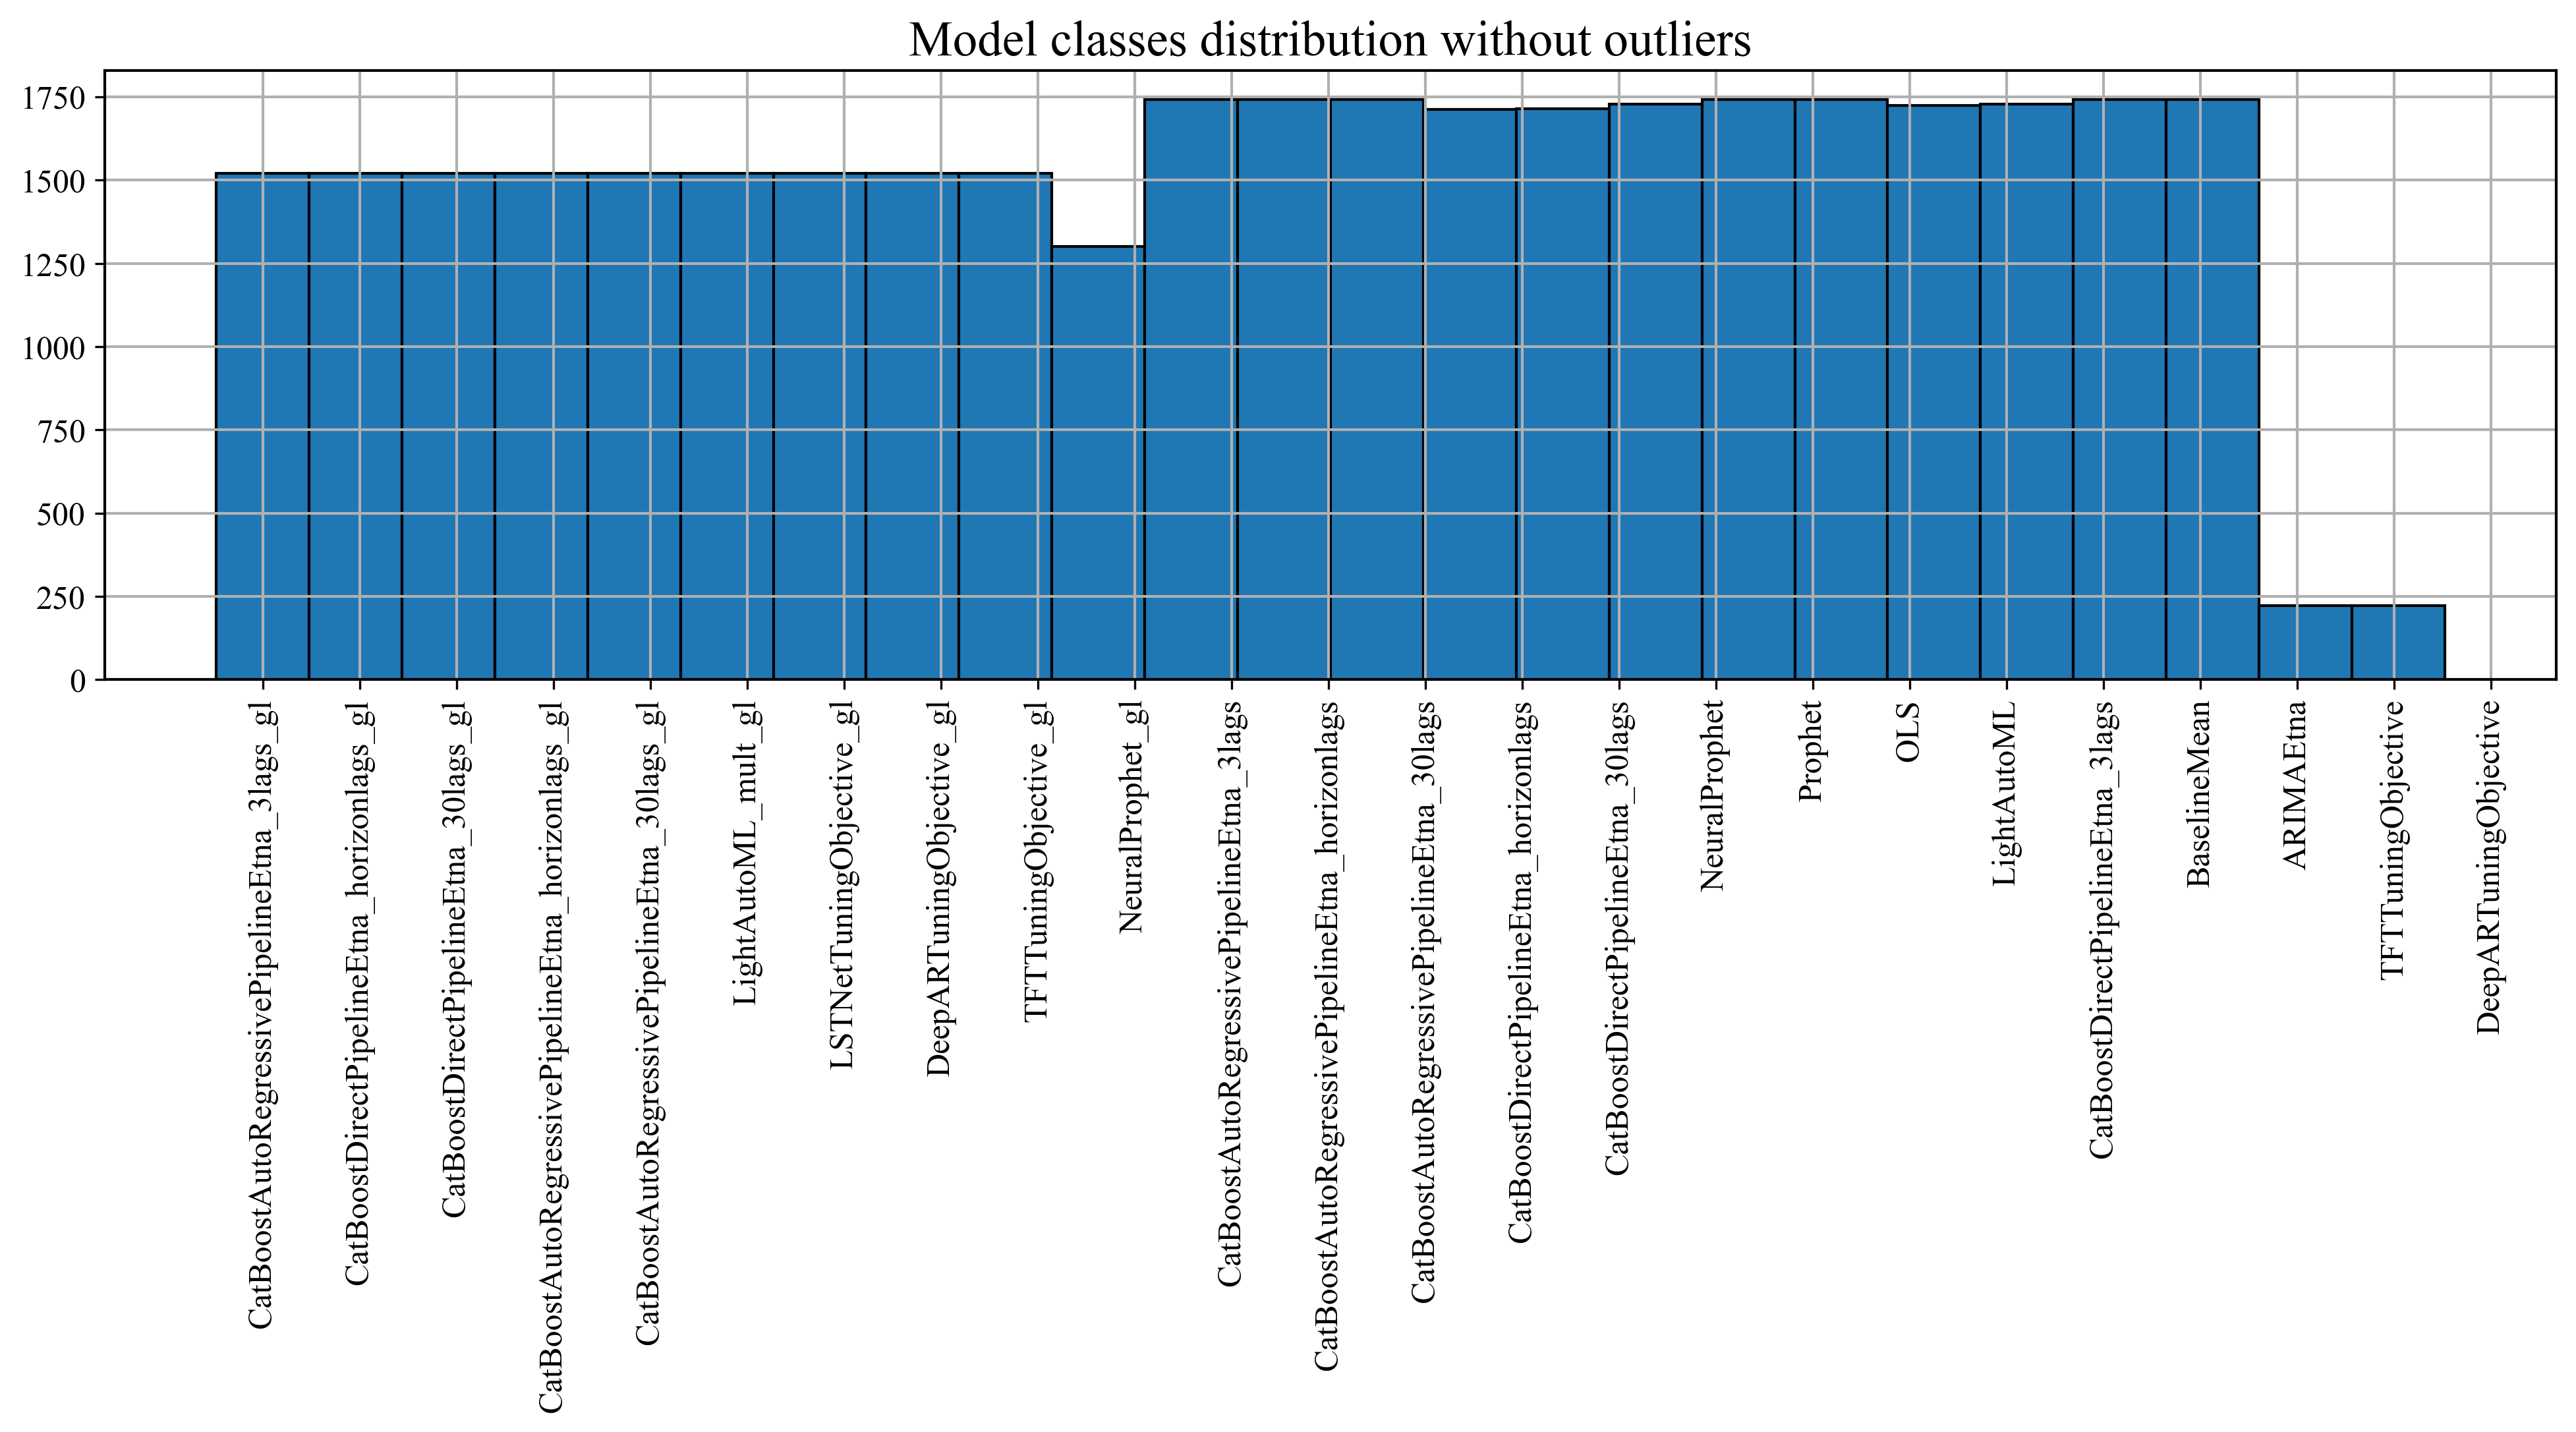

In [505]:
fig = plt.figure(figsize=(16,4))
plt.hist(data['model_name'], bins=len(data['model_name'].unique()), 
         align='left', edgecolor='black')
plt.xticks(rotation=90); plt.grid()
plt.title('Model classes distribution without outliers')
plt.show()

### Correlated values handling
Now, let's look at metrics correlation and drop out the correlated ones.

NB: all the correlation matrix below contains **absolute** correlation value, thus the sign of linear dependence is not accounted for. 

In [506]:
metrics = data.select_dtypes(include=np.number).columns.tolist()
np.abs(data[metrics].corr()).style.format("{:.2f}").background_gradient(cmap='Reds', high=1.01)

,train_time,forecast_time,MAE,MSE,RMSE,MASE,RMSSE,SMAPE
train_time,1.00,0.08,0.07,0.03,0.07,0.06,0.04,0.04
forecast_time,0.08,1.00,0.11,0.07,0.10,0.09,0.08,0.06
MAE,0.07,0.11,1.00,0.91,0.99,0.25,0.42,0.35
MSE,0.03,0.07,0.91,1.00,0.90,0.26,0.44,0.31
RMSE,0.07,0.10,0.99,0.90,1.00,0.22,0.40,0.27
MASE,0.06,0.09,0.25,0.26,0.22,1.00,0.89,0.37
RMSSE,0.04,0.08,0.42,0.44,0.40,0.89,1.00,0.41
SMAPE,0.04,0.06,0.35,0.31,0.27,0.37,0.41,1.00


We must drop out MAE and MSE, which correlate to the RMSE. The same applies to MASE and MAPE.

In [507]:
data = data.drop(['MAE', 'MSE', 'MASE'], axis=1)

In [508]:
metrics = data.select_dtypes(include=np.number).columns.tolist()
np.abs(data[metrics].corr()).style.format("{:.2f}").background_gradient(cmap='Reds', high=1.01)

,train_time,forecast_time,RMSE,RMSSE,SMAPE
train_time,1.00,0.08,0.07,0.04,0.04
forecast_time,0.08,1.00,0.10,0.08,0.06
RMSE,0.07,0.10,1.00,0.40,0.27
RMSSE,0.04,0.08,0.40,1.00,0.41
SMAPE,0.04,0.06,0.27,0.41,1.00


In [509]:
data = data.sort_values(by=['naming_orig'])
data.to_csv('./data/full.csv')

### Dataset split
Prepare both training and test datasets. Fill them with the best method for every time series.

In [510]:
def best_method(input, index, label, criteria, na_handling=np.nan, 
                greater_is_better=False):

    '''
    Function which extracts best model from results table w.r.t. listed criteria

    Parameters
    ----------
    input : DataFrame,
        table with results
    index : str,
        column, from which data will be used as a row index
    label : str,
        column, which contains method name or label
    criteria : list,
        set of criteria, which will be used to find best method
    na_handling : np.number,
        value for handling the missed values
    greater_is_better : bool,
        setting to choose either greatest or lowest value from criteria

    Returns
    ----------
    best_results : DataFrame,
        table which rows contains unique values from 'index' column;
        there are len(criteria)+1 columns: 1st contains values from 'rows'
        column, other columns contain label with the best method w.r.t to
        stated criteria
    '''

    # Prepare rows columns for the table
    rows = input[index].unique()
    # Prepare columns for criteria values and model names
    suffs = ['', '_model']; cols = []
    for suff in suffs: 
        for criterion in criteria: 
            cols.append(criterion+suff)
    cols = np.concatenate(([index], cols))
    # Define dataframe
    best_results = pd.DataFrame(index=rows, columns=cols, data=na_handling)
    best_results[index] = rows

    # Iterate over timeseries and criteria
    for row in rows:
        batch = input[input[index]==row]
        for criterion in criteria:
            # If parameter is toggled True, find the greatest value.
            # Otherwise - the lowest one
            if greater_is_better:
                best_model = batch.iloc[batch[criterion].argmax()]
            else:
                best_model = batch.iloc[batch[criterion].argmin()]
            best_results.loc[row, criterion+suffs[0]] = best_model.loc[criterion]
            best_results.loc[row, criterion+suffs[1]] = best_model.loc[label]
            
    # Substitute temporary indexes with integers
    best_results.index = np.arange(len(rows))
    return best_results

In [511]:
# Extract training dataset from the initial table
train = data[data['split']=='validation']
train = train.drop(labels=['split'], axis=1)
# Create table with best methods for each time series
train = best_method(train, 'naming_orig', 'model_name', 
                    ['RMSE', 'RMSSE', 'SMAPE'])
train = train.sort_values(by=['naming_orig'])
train

,naming_orig,RMSE,RMSSE,SMAPE,RMSE_model,RMSSE_model,SMAPE_model
0,danish_atm_daily_0,23.218063,0.427434,7.026373,TFTTuningObjective_gl,TFTTuningObjective_gl,LightAutoML_mult_gl
1,danish_atm_daily_1,38.754481,0.739715,7.451892,LightAutoML,LightAutoML,LightAutoML
2,danish_atm_daily_10,15.445235,0.272509,7.352141,TFTTuningObjective_gl,TFTTuningObjective_gl,TFTTuningObjective_gl
3,danish_atm_daily_100,14.839148,0.594626,11.260900,CatBoostAutoRegressivePipelineEtna_horizonlags_gl,CatBoostAutoRegressivePipelineEtna_horizonlags_gl,TFTTuningObjective_gl
4,danish_atm_daily_101,37.519490,0.760683,14.842628,CatBoostDirectPipelineEtna_30lags,CatBoostDirectPipelineEtna_30lags,CatBoostDirectPipelineEtna_30lags
...,...,...,...,...,...,...,...
866,nn5_95,4.530782,0.425082,6.984123,Prophet,Prophet,NeuralProphet
867,nn5_96,3.664217,0.422661,10.641290,NeuralProphet,CatBoostAutoRegressivePipelineEtna_30lags,NeuralProphet
868,nn5_97,3.081384,0.403758,7.315414,CatBoostAutoRegressivePipelineEtna_30lags,CatBoostDirectPipelineEtna_30lags,DeepARTuningObjective
869,nn5_98,3.369292,0.534465,8.683399,DeepARTuningObjective,CatBoostAutoRegressivePipelineEtna_30lags,LightAutoML


In [512]:
# Extract test dataset from the initial table
test = data[data['split']=='test']
test = test.drop(labels=['split'], axis=1)
# Create table with best methods for each time series
test = best_method(test, 'naming_orig', 'model_name', 
                    ['RMSE', 'RMSSE', 'SMAPE'])
test = test.sort_values(by=['naming_orig'])
test

,naming_orig,RMSE,RMSSE,SMAPE,RMSE_model,RMSSE_model,SMAPE_model
0,danish_atm_daily_0,29.608086,0.558906,10.782377,TFTTuningObjective_gl,TFTTuningObjective_gl,TFTTuningObjective_gl
1,danish_atm_daily_1,46.476081,0.888003,11.191710,CatBoostDirectPipelineEtna_3lags,CatBoostDirectPipelineEtna_3lags,LightAutoML
2,danish_atm_daily_10,14.278886,0.256301,7.867954,TFTTuningObjective_gl,TFTTuningObjective_gl,TFTTuningObjective_gl
3,danish_atm_daily_100,22.717200,0.896521,23.149428,Prophet,LSTNetTuningObjective_gl,CatBoostAutoRegressivePipelineEtna_3lags_gl
4,danish_atm_daily_101,25.814386,0.510870,16.457869,CatBoostDirectPipelineEtna_30lags,CatBoostDirectPipelineEtna_30lags,CatBoostDirectPipelineEtna_30lags
...,...,...,...,...,...,...,...
866,nn5_95,4.262411,0.431838,9.664710,CatBoostAutoRegressivePipelineEtna_3lags,CatBoostAutoRegressivePipelineEtna_3lags,DeepARTuningObjective
867,nn5_96,3.357216,0.464670,10.409026,LightAutoML,LightAutoML,LightAutoML
868,nn5_97,6.029740,0.625903,14.901800,CatBoostAutoRegressivePipelineEtna_horizonlags,Prophet,TFTTuningObjective
869,nn5_98,3.465682,0.452144,7.913091,CatBoostAutoRegressivePipelineEtna_30lags,CatBoostAutoRegressivePipelineEtna_30lags,TFTTuningObjective


In [513]:
# Assert set shapes equality 
assert train.shape == test.shape, f'Shapes are not equal: {train.shape} and {test.shape}'

In [514]:
test.to_csv('./data/preprocessed_test.csv')
train.to_csv('./data/preprocessed_train.csv')
data.to_csv('./data/preprocessed_full.csv')